# Fundamentos de Programación (Python)

**Bootcamp IA**

**Actividad Semana 1**

**Regresión lineal**


*Por: Óscar Emilio Mora Navarro*


Buenos días. Para estas variables la ecuación es:



,Carreras (x),Costo (y),xy,x^2
0,11,200500,2205500,121
1,25,180000,4500000,625
2,44,260000,11440000,1936
3,72,570000,41040000,5184
4,40,272000,10880000,1600
5,54,287000,15498000,2916
6,42,350000,14700000,1764
7,33,256000,8448000,1089
8,21,280500,5890500,441
9,37,256000,9472000,1369



m = 7498.35317496826
b = 19612.342907612212


Resultado usando las bibliotecas de Python

Coeficiente beta1:  7498.353174968261
Intercept: 19612.342907612212 
La ecuación es:  y= 7498.353174968261 X + 19612.342907612212

Error cuadrático medio: 6700559740.341386
rmse:  81856.94680564005
Estadístico R^2:  0.7600132015018916



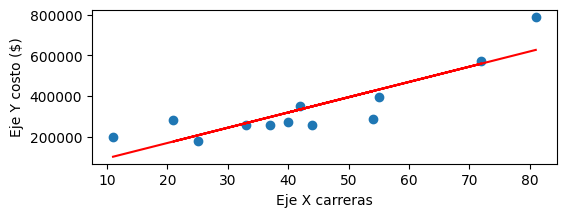


Ecuación polinómica

Valor de la pendiente o coeficiente "a": [    0.         -7198.17616866   157.83832605]

Valor de la intersección o coeficiente "b": 300055.6888189519

La ecuación es:  y= 157.83832604986128 X** -7198.176168662677 X + 300055.6888189519

Precisión del modelo:
0.9301882584596708


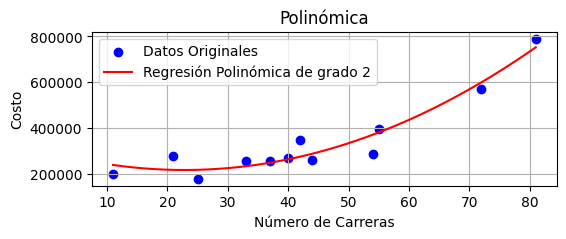

In [20]:

# Determinar la regresión entre el número de carreras mensuales en un
# proyecto y los costos de las carreras
#
# Importar bibliotecas
#
import pandas as pd
from matplotlib import style
import seaborn as sns

import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
from pytz import timezone

# Datos
carreras = [11,  25, 44, 72, 40, 54, 42, 33,
          21, 37, 55, 81] #número de carrera en el mes

costo = [200500, 180000, 260000,570000, 272000, 287000, 350000, 256000, 280500,
        256000, 395000, 790000] #costo total de las carreras por mes

# Verificar si el número de datos en carreras es igual al número de datos en costo
n_carreras = len(carreras)
n_costo = len(costo)
diferentes_n_datos = n_carreras != n_costo
if diferentes_n_datos == True:
   print("El número de datos en carreras es diferente al de costo")
else:
   sumatoria_x = sum(carreras)
   sumatoria_y = sum(costo)
   multiplicacion_xy = list(map(lambda a, b: a * b, carreras, costo))
   sumatoria_xy = sum(multiplicacion_xy)
   multiplicacion_x2 = list(map(lambda a, b: a * a, carreras, carreras))
   sumatoria_x2 = sum(multiplicacion_x2)
   m=((n_carreras*sumatoria_xy)-(sumatoria_x*sumatoria_y))/((n_carreras*sumatoria_x2)-(sumatoria_x*sumatoria_x))
   b=(sumatoria_y/n_carreras)-(m*(sumatoria_x/n_carreras))

# Crear un diccionario con los datos
data_dict = {
    "Carreras (x)": carreras,
    "Costo (y)": costo,
    "xy": multiplicacion_xy,
    "x^2": multiplicacion_x2}

# Convertir el diccionario en un DataFrame
df = pd.DataFrame(data_dict)

# Añadir una fila de suma
sum_row = df.sum()
#sum_row["Carreras (x)"] = "Total"
df = pd.concat([df, pd.DataFrame(sum_row).T], ignore_index=True)

#saludar dependiendo de la hora (formato militar:0-23 horas):
#Código adaptado de ejemplo dado en clase de Bootcamp IA
hora_1 = datetime.datetime.now(timezone('UTC'))
hora_actual = hora_1.astimezone(timezone('America/Bogota'))
hora=hora_actual.hour
#print("la hora es")
#print(hora)
print()
if 0<=hora<=12:
  print("\033[0;30m"+ 'Buenos días. Para estas variables la ecuación es:')
elif 12<hora<=18:
  print("\033[0;30m" + 'Buenas tardes. Para estas variables la ecuación es:')
else:
   print("\033[0;30m" + 'Buenas noches. Para estas variables la ecuación es:')


# Definir el estilo para agregar un marco alrededor de la tabla
styled_df = df.style.set_table_styles([{
    'selector': 'table',
    'props': [('border', '2px solid black')]
}])

# Establecer borde inferior grueso solo para la última y penúltima fila
styled_df = styled_df.set_table_styles([
    {'selector': 'tr:nth-last-child(1)', 'props': [('border-bottom', '4px solid black')]},
    {'selector': 'tr:nth-last-child(2)', 'props': [('border-bottom', '4px solid black')]}
])

# Mostrar el DataFrame con el estilo aplicado
print()
display(styled_df)

#imprimir variables y resultado
print()
#print(df)
print("m =", m)
print("b =", b)
print()

#Crear dataframe para hacer gráfica
datos = pd.DataFrame({'carreras': carreras, 'costo': costo})
datos.head(3)

x = datos[['carreras']]
y = datos['costo']

# Modelo de regresión lineal
modelo = linear_model.LinearRegression()

#Regresión lineal
# Entreno el modelo con los datos (X,Y)
modelo.fit(x, y)
# Ahora se obtine el coeficiente b_1
print("\033[1;35m")
print("Resultado usando las bibliotecas de Python")
print ("\033[0;30m")
print('Coeficiente beta1: ', modelo.coef_[0])
print("Intercept:", modelo.intercept_, "\033[1;30m")
print("La ecuación es:", "\033[1;35m", "y=",modelo.coef_[0],"X +",
       modelo.intercept_ )
print ("\033[0;30m")

# Se predice usando el modelo
y_pred = modelo.predict(x)

# Calcular el error cuadrático medio y el estadístico R^2
print ('Error cuadrático medio:', mean_squared_error(y, y_pred))
rmse = mean_squared_error(y, y_pred)**0.5
print ('rmse: ', rmse)
print ('Estadístico R^2: ' , r2_score(y, y_pred))
print()

# Crear la gráfica con tamaño reducido
plt.figure(figsize=(6, 2))  # Tamaño reducido a (6, 2) pulgadas

# Mostrar el ajuste (rojo)
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', label='recta de regresión')
plt.xlabel('Eje X carreras')
plt.ylabel('Eje Y costo ($)')
plt.show()

#Regresión polinómica
#Definir el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)
#Se transforma las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(x)
y_train_p = y

#Definir el algoritmo a utilizar
pr = linear_model.LinearRegression()

#Entrenar el modelo
pr.fit(X_train_poli, y_train_p)

print("\033[1;35m")
print("Ecuación polinómica")
print ("\033[0;30m")
print('Valor de la pendiente o coeficiente "a":', pr.coef_)
print()
print('Valor de la intersección o coeficiente "b":', pr.intercept_)
print()
print("La ecuación es:", "\033[1;35m", "y=",pr.coef_[2],"X**", pr.coef_[1],
        "X +",pr.intercept_ )
print ("\033[0;30m")
print('Precisión del modelo:')
print(pr.score(X_train_poli, y_train_p))


#Código de gráfica generado por Chat GPT
# Me puedes dar el código para dibujar una gráfica polinómica usando regresión

# Ajustar un polinomio de grado 2
grado_polinomio = 2
coeficientes = np.polyfit(carreras, costo, grado_polinomio)
polinomio = np.poly1d(coeficientes)

# Generar valores de x para evaluar el polinomio
x = np.linspace(min(carreras), max(carreras), 400)
y = polinomio(x)

# Crear la gráfica
plt.figure(figsize=(6, 2))
plt.scatter(carreras, costo, color='blue', label='Datos Originales')
# Graficar los puntos de datos originales
plt.plot(x, y, color='red', label=f'Regresión Polinómica de grado {grado_polinomio}')
# Graficar el polinomio ajustado
plt.title('Polinómica')
plt.xlabel('Número de Carreras')
plt.ylabel('Costo')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
df.describe()

,Carreras (x),Costo (y),xy,X2
count,13.000000,1.300000e+01,1.300000e+01,13.000000
mean,79.230769,6.303077e+05,3.227523e+07,4097.076923
std,132.365752,1.054929e+06,5.601105e+07,7021.666047
min,11.000000,1.800000e+05,2.205500e+06,121.000000
25%,33.000000,2.560000e+05,8.448000e+06,1089.000000
50%,42.000000,2.805000e+05,1.144000e+07,1764.000000
75%,55.000000,3.950000e+05,2.172500e+07,3025.000000
max,515.000000,4.097000e+06,2.097890e+08,26631.000000
